In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
p = []
ppath = '../txtfiles-5/'
p.append(pd.read_csv(ppath + 'p10.txt', sep=' ', header=0))
p.append(pd.read_csv(ppath + 'p20.txt', sep=' ', header=0))
p.append(pd.read_csv(ppath + 'p40.txt', sep=' ', header=0))
cases=len(p)
q = pd.read_csv('../txtfiles-6/plot_ene/p10_e.txt', sep=' ', header=0)

cols = ['m', 'ms', 'e', 'sp_h']

Plaquette of L = 10, 20, 40


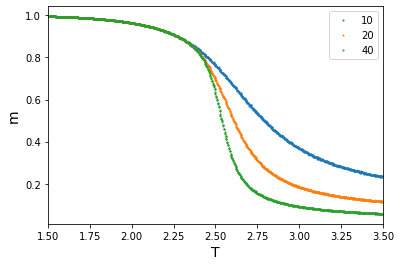

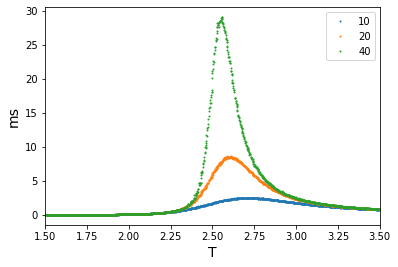

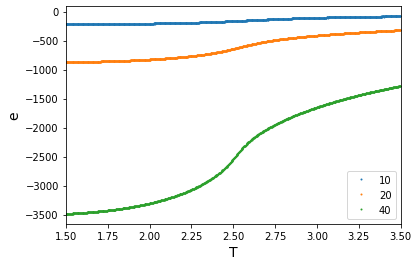

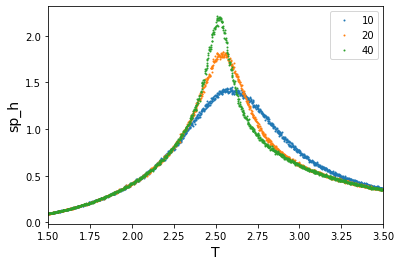

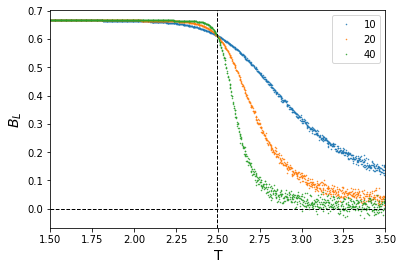

In [11]:
print("Plaquette of L = 10, 20, 40")
for j in range (4):
    for i in range (cases):
        plt.plot(p[i].temperature, p[i][cols[j]], 'o', markersize=1, label=2**i*10)
    plt.xlabel('T', fontsize=14)
    plt.ylabel(cols[j], fontsize=14)
    plt.xlim(1.5, 3.5)
    plt.legend()
    plt.show()

T_c = 2.493
for i in range (cases):
    plt.plot(p[i].temperature, 1-p[i].m4/(3*p[i].m2**2), '.', markersize=1, label=2**i*10)
plt.axhline(y=0, color='k', linewidth=1, linestyle='--')
plt.axvline(x=T_c, color='k', linewidth=1, linestyle='--')
plt.xlim(1.5, 3.5)
plt.xlabel('T', fontsize=14)
plt.ylabel('$B_L$', fontsize=14)
plt.legend()
plt.show()

# I. plot All

Plaquette & Fitted of L=10


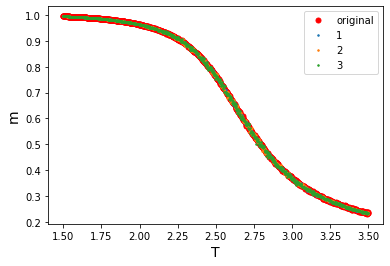

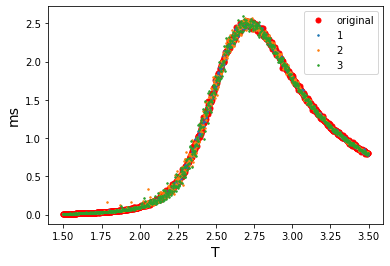

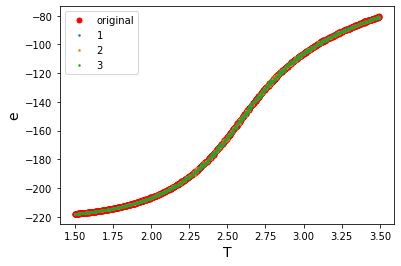

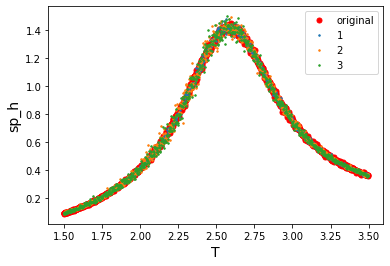

In [9]:
fit_path = '../txtfiles-6/plot_A/plot_' + 'eff'
fit = []
fit.append(pd.read_csv(fit_path + '_1_1.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_2_1.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_1.txt', sep = ' ', header = 1))
for j in range (4):
    plt.plot(p[0].temperature, p[0][cols[j]], 'r.', markersize = 10, markerfacecolor = None, linestyle = 'None', label = 'original')
    for i in range (len(fit)):
        plt.plot(fit[i].temperature[fit[i].temperature>=1.5], fit[i][cols[j]][fit[i].temperature>=1.5], '.', markersize = 3, label = i+1)
    plt.xlabel('T', fontsize=14)
    plt.ylabel(cols[j], fontsize=14)
    plt.legend()
    plt.show()

# II. plot Energy

In [ ]:
fit = []
labels = ['3', '1']
target = 'met' # met, eff, srch
fit_path = '../txtfiles-6/plot_ene/' + target
fit.append(pd.read_csv(fit_path + '_3_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_1024.txt', sep = ' ', header = 1))
#fit.append(pd.read_csv(fit_path + '_3_2048.txt', sep = ' ', header = 1))
#fit.append(pd.read_csv(fit_path + '_1_2048.txt', sep = ' ', header = 1))
#fit.append(pd.read_csv(fit_path + '_1_4096.txt', sep = ' ', header = 1))
#fit.append(pd.read_csv(fit_path + '_3_4096.txt', sep = ' ', header = 1))

for i in range (int(len(fit)/2)): # 1024, 2048, 4096
    for j in range (len(labels)): # nnn nth = 1, 3
        R2 = 1 - np.sum((np.array(fit[2*i+j].e) - np.array(q.e))**2) / np.sum((fit[2*i+j].e - np.average(fit[2*i+j].e))**2)
        print(labels[j], ":", R2)
        plt.plot(fit[2*i+j].e, q.e, '.', markersize = 3, label = labels[j])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(target, fontsize=12)
    plt.ylabel('original', fontsize=12)
    plt.legend()
    plt.show()

    for j in range (2):
        plt.plot(q.temp, (np.array(fit[2*i+j].e) - np.array(q.e))**2, '.', markersize = 3, label=labels[j])
    plt.ylim(0, 75)
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()
    
    plt.plot(q.temp, q.e, 'r.', markersize = 20, markerfacecolor = None, label='org')
    for j in range (2):
        plt.plot(fit[2*i+j].temperature, fit[2*i+j].e, '.', markersize = 3, label=labels[j])
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()

3 : 0.9980529594579894
1 : 0.9996497667105083


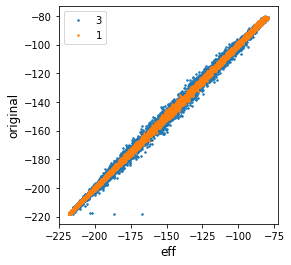

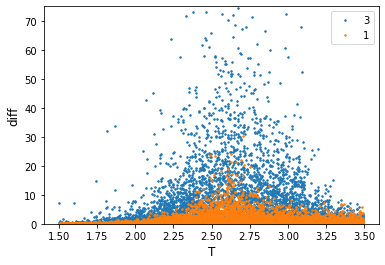

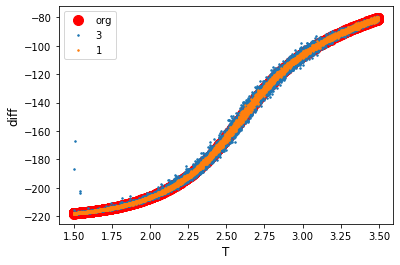

3 : 0.9994300500264944
1 : 0.9997915851810159


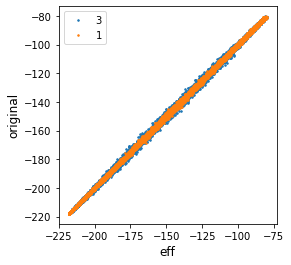

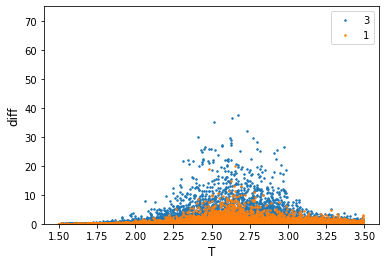

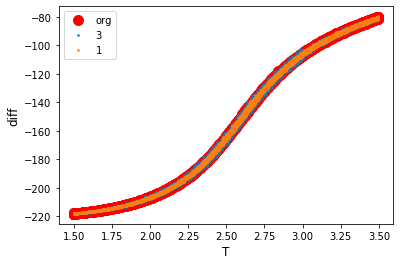

In [44]:
fit = []
labels = ['3', '1']
target = 'eff' # met, eff, srch
fit_path = '../txtfiles-6/plot_ene/' + target
fit.append(pd.read_csv(fit_path + '_3_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_4096.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_4096.txt', sep = ' ', header = 1))

for i in range (int(len(fit)/2)): # 1024, 2048, 4096
    for j in range (len(labels)): # nnn nth = 1, 3
        R2 = 1 - np.sum((np.array(fit[2*i+j].e) - np.array(q.e))**2) / np.sum((fit[2*i+j].e - np.average(fit[2*i+j].e))**2)
        print(labels[j], ":", R2)
        plt.plot(fit[2*i+j].e, q.e, '.', markersize = 3, label = labels[j])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(target, fontsize=12)
    plt.ylabel('original', fontsize=12)
    plt.legend()
    plt.show()

    for j in range (2):
        plt.plot(q.temp, (np.array(fit[2*i+j].e) - np.array(q.e))**2, '.', markersize = 3, label=labels[j])
    plt.ylim(0, 75)
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()
    
    plt.plot(q.temp, q.e, 'r.', markersize = 20, markerfacecolor = None, label='org')
    for j in range (2):
        plt.plot(fit[2*i+j].temperature, fit[2*i+j].e, '.', markersize = 3, label=labels[j])
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()

3 : 0.9980529594579894
1 : 0.9996497667105083


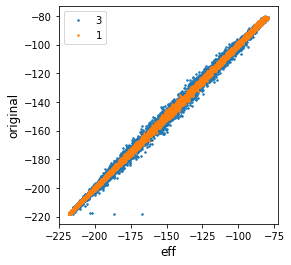

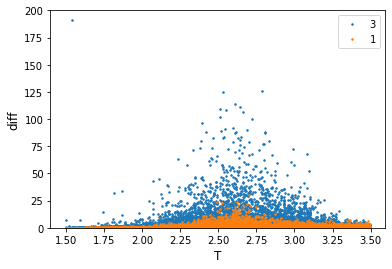

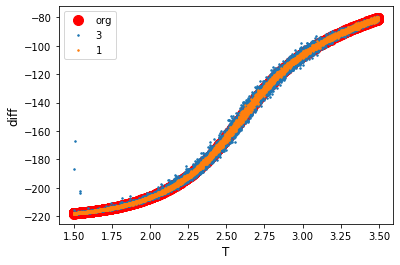

3 : 0.9994300500264944
1 : 0.9997915851810159


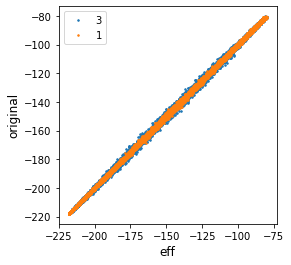

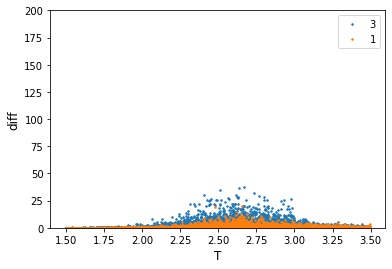

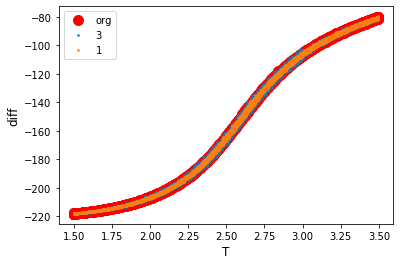

3 : 0.9996079715633984
1 : 0.9998742868415753


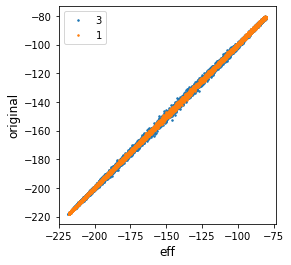

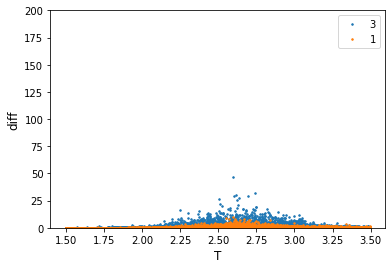

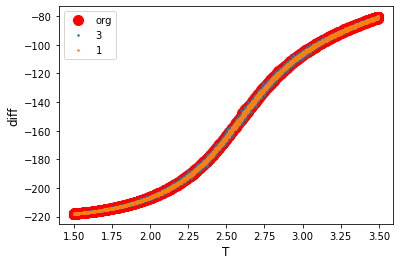

In [49]:
fit = []
labels = ['3', '1']
target = 'eff' # met, eff, srch
fit_path = '../txtfiles-6/plot_ene/' + target
fit.append(pd.read_csv(fit_path + '_3_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_4096.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_4096.txt', sep = ' ', header = 1))

for i in range (int(len(fit)/2)):
    for j in range (2):
        R2 = 1 - np.sum((np.array(fit[2*i+j].e) - np.array(q.e))**2) / np.sum((fit[2*i+j].e - np.average(fit[2*i+j].e))**2)
        print(labels[j], ":", R2)
        plt.plot(fit[2*i+j].e, q.e, '.', markersize = 3, label = labels[j])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(target, fontsize=12)
    plt.ylabel('original', fontsize=12)
    plt.legend()
    plt.show()

    for j in range (2):
        plt.plot(q.temp, (np.array(fit[2*i+j].e) - np.array(q.e))**2, '.', markersize = 3, label=labels[j])
    plt.ylim(0, 200)
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()
    
    plt.plot(q.temp, q.e, 'r.', markersize = 20, markerfacecolor = None, label='org')
    for j in range (2):
        plt.plot(fit[2*i+j].temperature, fit[2*i+j].e, '.', markersize = 3, label=labels[j])
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()